# Snap module

This notebook showcase how snap module is performed and how the occulsion report (display rate of all mask in each image) is calculated

In [1]:
import os
os.chdir("../../")
print(os.getcwd())
# note: make sure this should be in the OpenIns3D main directory

/scratch/OpenIns3D


In [2]:
import sys
sys.path.append("./openins3d")

In [3]:
from openins3d.snap import Snap
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
from openins3d.utils import mask_rasterization, read_plymesh, display_snap_image
from glob import glob
import numpy as np

# load 3d scene and masks

mesh_path = "data/replica/scenes/office4.ply"
mask_path = "data/replica/masks/ground_truth/office4.pt"
scan_pc = read_plymesh(mesh_path)[0]
mask_list = torch.load(mask_path).to_dense()
scan_pc = torch.tensor(scan_pc)

image_width = 1000
image_height = 1000
# Camera adjustment parameters
lift_cam = 3  # Vertical lift of the camera (increase to lift the camera higher)
zoomout = 0.1  # Zoom out factor to view the scene with a wider angle
remove_lip = 1.0  # Distance to remove the ceiling or upper part of the scene for better visibility, if needed
adjust_camera = [lift_cam, zoomout, remove_lip]
image_size = [image_width, image_height]
snap_module = Snap(image_size, adjust_camera, save_folder="output/snap")
mode_all = ["corner", "global", "wide"]

# Render Images with Snap Module

In [ ]:
# Note: This could take a while and generated images are saved under the folder "output/snap"
mode_selected = mode_all[0] # 0: corner, 1: global, 2: wide
# start to render images
for mode_selected in mode_all:
        _,_ =snap_module.scene_image_rendering(mesh_path, mode_selected, mode=[mode_selected])
print("saved all images")

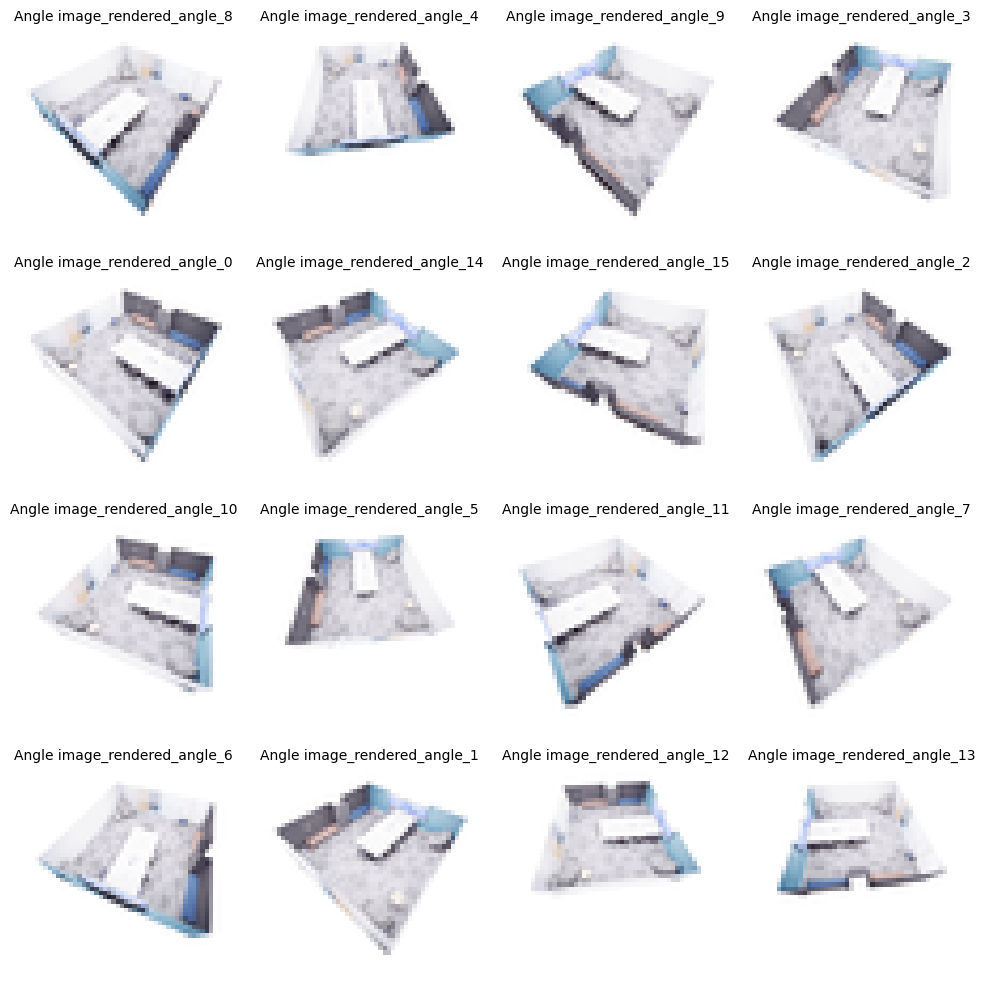

In [6]:
# display image 
# feel free to change mode to see the images or you can go to the "output/snap" to see the images
mode_selected = mode_all[1] # 0: corner, 1: global, 2: wide
snap_image_path = f"output/snap/{mode_selected}/image"
display_snap_image(snap_image_path, size=(250, 250))

In [ ]:
# colorcoded masks and render images
# Note: This could take a while and generated images are saved under the folder "output/snap"
# start to render images
for mode_selected in mode_all:
    _,_ =snap_module.scene_image_rendering(mesh_path, f"{mode_selected}_withmasks", mode=[mode_selected], mask=[mask_list, None])

In [ ]:
# display image, feel free to change mode.

mode_selected = mode_all[1] # 0: corner, 1: global, 2: wide
snap_image_path = f"output/snap/{mode_selected}_withmasks/image"
display_snap_image(snap_image_path, size=(250, 250))

# Calculate Display Rate for each masks.

Here the display rate of each masks are calculate for each image. Results are saved under 'output/snap'

In [ ]:
# calculate the display rate and save it under the folder "output/snap"
for mode_selected in mode_all:
    display_rate = snap_module.mask_rasterization_display_rate(scan_pc, mode_selected, [mask_list, None])
    strings = [list(map(str, np.round(display_rate.cpu().numpy(), 2).flatten())) for display_rate in display_rate]
    _, _ = snap_module.scene_image_rendering(mesh_path, f"{mode_selected}_display_rate", mode=[mode_selected], mask=[mask_list, strings])

In [ ]:
# display image 
mode_selected = mode_all[0] # 0: corner, 1: global, 2: wide
snap_image_path = f"output/snap/{mode_selected}_display_rate/image"
display_snap_image(snap_image_path, size=(250, 250))